In [1]:
# Import libraries

import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Get the website to scrape

page = requests.get("https://bandi.miur.it/bandi.php/public/cercaFellowship?jf_comp_status_id=2-3&bb_type_code=%25&idarea=%25&azione=cerca")

In [3]:
#Html parser using BS

soup = BeautifulSoup(page.content, 'html.parser')

In [4]:
# Extract title of research projects using a list comprehension

titles = [i.get_text() for i in soup.find_all('a', text=True)[4:-2]]

In [5]:
# print the list of projects 

# print(*titles,sep='\n')


In [6]:
df1 = pd.DataFrame(titles)

In [7]:
# Extract university names using a list comprehension

university = [i.get_text() for i in soup.find_all("strong")]

In [8]:
# Create a filter lambda function that removes department (e.g. Settore AGR/02) from the list

university = list(filter(lambda x: 'Settore' not in x, university))

In [9]:
df2 = pd.DataFrame(university)

In [10]:
# Now i want scrape the deadline of the project call

In [11]:
# lets take a look at the html to find the relevant html tags

soup.prettify()

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html lang="it" xml:lang="it" xmlns="http://www.w3.org/1999/xhtml">\n <head>\n  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>\n  <meta content="Bandi per Assegni di ricerca" name="title"/>\n  <meta content="bandi, assegni, ricerca, miur" name="keywords"/>\n  <meta content="it" name="language"/>\n  <title>\n   Bandi per Assegni di ricerca\n  </title>\n  <link href="/images/favicon.ico" rel="shortcut icon"/>\n  <link href="/css/bandi.css" media="screen" rel="stylesheet" type="text/css"/>\n  <link href="/css/schede.css" media="screen" rel="stylesheet" type="text/css"/>\n  <link href="/css/stampa.css" media="print" rel="stylesheet" type="text/css"/>\n  <script src="/js/jquery-1.5.2.min.js" type="text/javascript">\n  </script>\n  <script src="/js/menudinamico.js" type="text/javascript">\n  </script>\n  <script src="/js/jquery.pagination.js" type=

In [12]:
# Find all elements with the class 'example-class'
elements = soup.find_all(class_='aperto')

# Iterate through the elements and print their text
for element in elements:
    print(element.text)

 scade il giorno 30/01/2023
 scade il giorno 30/01/2023
 scade il giorno 30/01/2023
 scade il giorno 30/01/2023
 scade il giorno 30/01/2023
 scade il giorno 30/01/2023
 scade il giorno 30/01/2023
 scade il giorno 30/01/2023
 scade il giorno 30/01/2023
 scade il giorno 30/01/2023
 scade il giorno 30/01/2023
 scade il giorno 30/01/2023
 scade il giorno 30/01/2023
 scade il giorno 30/01/2023
 scade il giorno 30/01/2023
 scade il giorno 30/01/2023
 scade il giorno 30/01/2023
 scade il giorno 30/01/2023
 scade il giorno 30/01/2023
 scade il giorno 30/01/2023
 scade il giorno 30/01/2023
 scade il giorno 30/01/2023
 scade il giorno 30/01/2023
 scade il giorno 30/01/2023
 scade il giorno 30/01/2023
 scade il giorno 30/01/2023
 scade il giorno 30/01/2023
 scade il giorno 30/01/2023
 scade il giorno 30/01/2023
 scade il giorno 30/01/2023
 scade il giorno 30/01/2023
 scade il giorno 30/01/2023
 scade il giorno 30/01/2023
 scade il giorno 30/01/2023
 scade il giorno 30/01/2023
 scade il giorno 30/

In [13]:
df3 = pd.DataFrame(elements)

In [14]:
# Check the length of the 3 df's (they should be the same len)

len(df1) == len(df2) == len(df3)

True

In [15]:
# Merge the two dataframes 

merged_df = pd.concat([df1, df2, df3], axis=1)

In [16]:
merged_df.columns = ['Project', 'University', 'Deadline']


In [17]:
# Clean the deadline column to remove the 'scade il giorno' sub-string
merged_df['Deadline'] = merged_df['Deadline'].apply(lambda x: x.replace('scade il giorno', ''))

# 
# Create Research Job Search filter 




In [18]:
includeKeywords = ["economic"]

In [19]:
# Create new df of filtered list of research projects using a list comprehension

df4 = merged_df[merged_df.apply(lambda r: any([kw in r[0] for kw in includeKeywords]), axis=1)]

In [20]:
df4

,Project,University,Deadline
7,Id 3571 Analisi e sviluppo di modelli macroeco...,Sc.Sup. S.Anna PISA,30/01/2023
79,Costruzione di una Social Accounting Matrix (S...,Univ. MACERATA,31/01/2023
184,On the economic sustainability of a regional e...,Univ. BOLOGNA,02/02/2023
337,Theoretical framework and measurement on the n...,Univ. FIRENZE,10/02/2023
394,Integrazione di banche dati su consumi sanitar...,Univ. BOLOGNA,15/02/2023
519,Metodi statistici per l’analisi di dati comple...,Univ. UDINE,28/02/2023
571,AGEING WELL IN AN AGING SOCIETY: the economic ...,Univ. BOLOGNA,20/03/2023
621,Alternative protein food: agro-food system eco...,Univ. BOLOGNA,04/04/2023
659,Advances in economics,Univ. BOLOGNA,31/05/2023
667,Valutazione degli impatti socioeconomici provo...,Univ. BARI,26/10/2023


In [21]:
# Export to excel

df4.to_excel("output.xlsx") 

In [22]:
# Create a barplot to see which universities have the most calls open

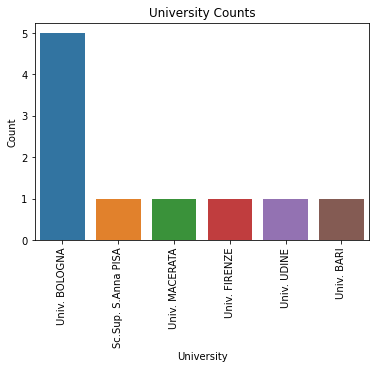

In [23]:
sns.countplot(x='University', data=df4, order=df4['University'].value_counts().index)

# Add a title and labels
plt.title('University Counts')
plt.xlabel('University')
plt.ylabel('Count')

# Rotate the x-tick labels
plt.xticks(rotation=90)

# Show the plot
plt.show()